Tenemos un conjunto de datos de los arretos en Usa segun el delito comeido (asesinato, violacion y asalto ) ademas se tiene el tamaño de la poblacion urbana. Queremos saber si
podemos reducir la cantidad de caracteristicas manteniendo la varianaza explicada

In [ ]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#graficas
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')



In [ ]:
#Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

#Implementación de PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import minmax_scale, MinMaxScaler

#Advertencias
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#implementacion de PCA
USArrests= sm.datasets.get_rdataset('USArrests', "datasets")
data=USArrests.data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
data

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [ ]:
print("desviacion estandar de cada variable")
data.std(axis=0)

desviacion estandar de cada variable


,0
Murder,4.355510
Assault,83.337661
UrbanPop,14.474763
Rape,9.366385


In [ ]:
#modelo pca
#reduce la cantidad de dimensiones generando componentes ortogonales entre si maximisando la varianza explicadad por cada compoenete
#Pipeline para escalar y crear modelo pca
pca_pipeline= make_pipeline(MinMaxScaler(),PCA())
pca_pipeline.fit(data)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA())])

In [ ]:
pca_model= pca_pipeline.named_steps['pca']

In [ ]:
pd.DataFrame(data= pca_model.components_, columns=data.columns, index =["PC1", "PC2","PC3", "PC4"])
#reconstruir una compbinacion lineal para poder reacer las variables a esas componentes principales
#cada componente explicara una parte de la varianza

,Murder,Assault,UrbanPop,Rape
PC1,0.547500,0.645931,0.229559,0.479916
PC2,-0.387958,-0.152124,0.880444,0.226196
PC3,-0.268188,-0.264693,-0.380839,0.844378
PC4,-0.691236,0.699692,-0.164568,-0.074435


In [ ]:
#varianza expicada por componente
print("Varianza explicada por cada componente")
print(pca_model.explained_variance_ratio_)

Varianza explicada por cada componente
[0.64272873 0.22804606 0.08097894 0.04824627]


In [ ]:
variance_cum=pca_model.explained_variance_ratio_.cumsum()
print("Varianza acumulada")
print(variance_cum)
#cuantas comp acum el 80 de la var, si son 2 me puedo quedar con 2


Varianza acumulada
[0.64272873 0.87077478 0.95175373 1.        ]


In [ ]:
#modelo final
pca_pipeline= make_pipeline(MinMaxScaler(),PCA(n_components=2))
pca_pipeline.fit(data)
pca_final_model=pca_pipeline.named_steps["pca"]

In [ ]:
pd.DataFrame(data= pca_final_model.components_, columns=data.columns, index =["PC1", "PC2"])

,Murder,Assault,UrbanPop,Rape
PC1,0.547500,0.645931,0.229559,0.479916
PC2,-0.387958,-0.152124,0.880444,0.226196


##Nuevo Ejemplo - Mercadeo



#**Caso de aplicacion de agrupamiento: Aerolinea (Mercadeo)**
#Metodologia asum-dm


1. Entendimiento del negocio, es una aerolinea que busca entender a sus clientes en particular, el objetivo del negocio es entender las diferencias o particularidades entre clientes para ocrecer modelos diferenciados actuales  
2. Enfoque analitico: diseñar un esperimento que permita agrupar en una cantidad especifica de grupos a los clientes de la aerolinea para definir la cantidad de acciones diferenciadas posibles. Se esta montando un experimento para montar .No esisten variables especificas o particulares que nos lleven a
3. Requerimiento de datos: Se requieren datos demográficos, datos de servicio prestado al usuario, datos propios del negocio.
4. Recolección de datos: los datos de genero, del tipo de servicio, ect.
4. Entendimiento de los datos:
-verificar la existencia de datos nulos
-exploracion univariada de los datos
-exploracion multivariada de los datos
-identificacion de correlacion y multicolinealidad.


In [ ]:
#librerias
import pandas as pd
import numpy as np
#
import matplotlib.pyplot as plt
import seaborn as sb
#
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/airline_loyalty.csv")
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86147,86147,85437,Male,Loyal Customer,47,Business travel,Eco,152,3,3,...,3,3,1,4,3,4,3,0,0.0,neutral or dissatisfied
86148,86148,95208,Female,Loyal Customer,21,Personal Travel,Eco,148,2,4,...,3,4,5,4,4,5,3,45,50.0,neutral or dissatisfied
86149,86149,17274,Female,Loyal Customer,31,Personal Travel,Eco,1092,2,1,...,5,4,5,4,4,4,5,0,0.0,neutral or dissatisfied
86150,86150,64929,Female,Loyal Customer,31,Business travel,Eco,190,2,2,...,2,1,1,3,1,4,2,2,0.0,neutral or dissatisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86152 entries, 0 to 86151
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         86152 non-null  int64  
 1   id                                 86152 non-null  int64  
 2   Gender                             86152 non-null  object 
 3   Customer Type                      86152 non-null  object 
 4   Age                                86152 non-null  int64  
 5   Type of Travel                     86152 non-null  object 
 6   Class                              86152 non-null  object 
 7   Flight Distance                    86152 non-null  int64  
 8   Inflight wifi service              86152 non-null  int64  
 9   Departure/Arrival time convenient  86152 non-null  int64  
 10  Ease of Online booking             86152 non-null  int64  
 11  Gate location                      86152 non-null  int

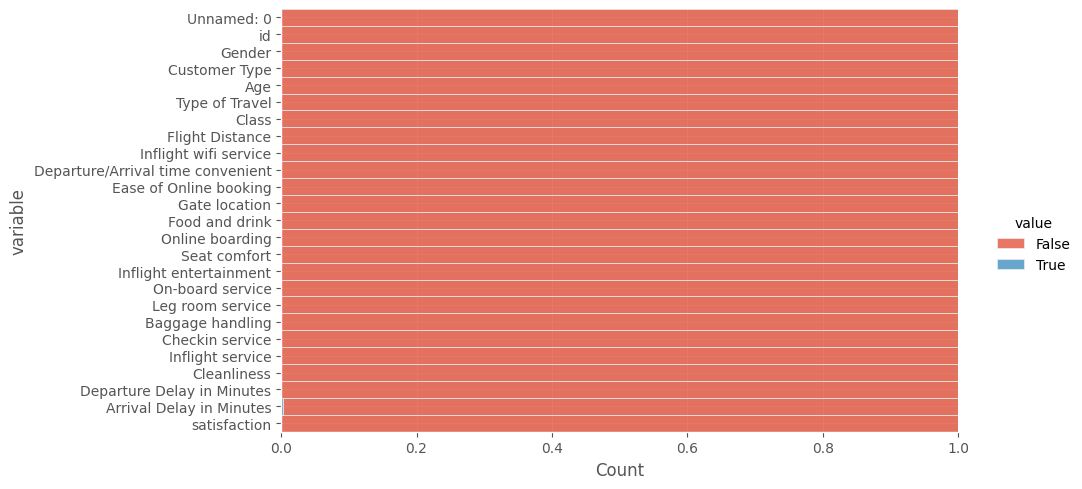

In [ ]:
#visualizar proporcion de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y= "variable" , hue= "value" , multiple="fill", aspect=2))
plt.show()

Solo hay una variable con datos nulos lo que implica ciertas facildades.
hay dos caminos con los datos nulos.
los datos nulos son datos que se tienen que tratar, ya que si no se hace el modelo no puede entender la información que se le da.
**Tenemos menos del 5% de datos nulos por lo que se trabajará por imputación simple**

#1. Eliminar
Reduce la capacidad predictiva del modelos
para decidir esto es bueno utilizar otro grafico para entender la dispersion de los datos nulos en los individuos.
1. **Registros:** cuando la proporcion de eliminacion total no supera el 10% de los registros originales, es una recomendación. Ya que si se supera este valor, se está perdiendo capacidad predictiva
2. **Variables:** Solo hay una variable unica con nulos, pero es cuando la proporcion de nulos en una variable supera el 40%. Osea que en la gráfica cundo se esté en naranjada, ya que es una variable altamente nula. Que es generar muchos registros sinteticos de una variable, como inventarse dinámicas.

#2. imputar
1. **imputación simple:**
Va a modificar la función de probabilidad, ejem. si se imputa con la media va a escalar la curtosis. Eso modifica la funcion de probabilidad.
- imputación constante: se define un valor arbitrario para completar por variable, pero se es conciente del valo que se decidió imputar.
- medidas de tendencia central: para variable númericas se puesde imputar con media o mediana, para variables catégoricas solo con moda.
2. **Modelo:** Construye un modelo de ML de regresión para completar los datos nulos, va a utilizar las variables de mayor completitud para completar las otres. Trata de mantener la funcion y dinámicas de los datos de la variable, para reducir el sesgo dado. Mejor camino. Ejm. imputación iterativa.   

<Axes: >

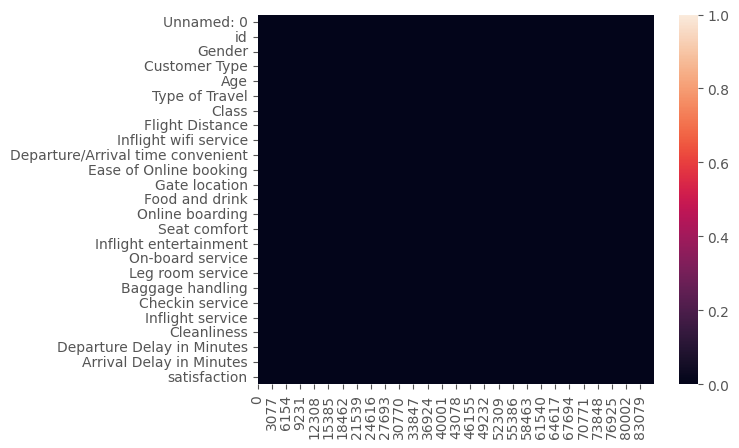

In [ ]:
#para visualizar los 300 individuos con datos nulos, lo balnco es lo nulo
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df) )

#Exploración univariada de los datos
-Para los datos númericos: histograma de frecuencia
-Para los datos categóricos: gráficos de torta


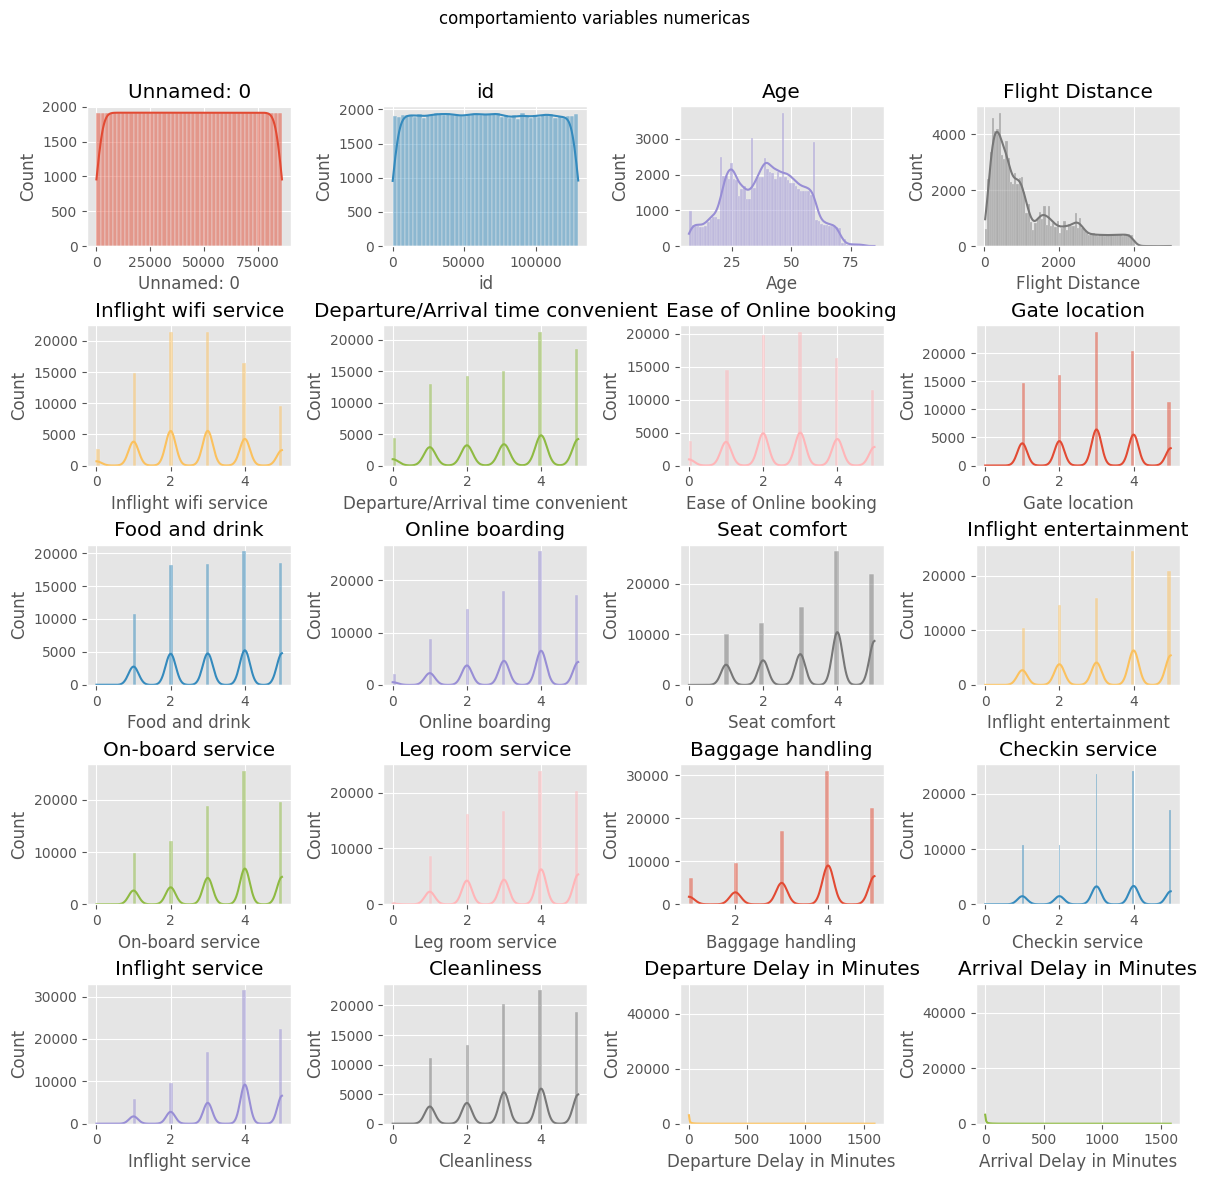

In [ ]:
##Histograma de frecuencia
fig, ax = plt.subplots(5, 4, figsize=(12,12))
ax= ax.flat
num_col = data.select_dtypes(include=["int64", "float64"]).columns
for i, col in enumerate(num_col):
  sb.histplot(data=data, x=col,
              kde=True, color= (list(plt.rcParams["axes.prop_cycle"])*7)[i]["color"], ax=ax[i])
  ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("comportamiento variables numericas")
plt.show()


##Variables
-0: no me dice nada

-id: no es relevante para el modelo pero es importante para después.

-Age: variable bimodal, 2 tipos distintos de personas. Y se puede ver qué grupo de edad utiliza menos los vuelos osea que son de menor frecuencia.

-F.D: es sesgada y lognormal, ya que la mayoria de los vuelos son de distancias más cortas.

-I wifi: Es una cualidad del servicio, variables de escala liken, variables categoricas presentadas de forma númerica. Existen dos caminos, el primero es volverlas categoricas y tratarlas de forma ordinal. No se buscan ni sesgos sino que desbalance, que habla de escenarios o valores de las variables de maxima frecuencia o proporción.
Es por eso que el gráfico que se utiliza para la variables catégoricas es un pie chart. Si una categoria tiene el 80% o más de la proporción de la variable hablamos de desbalance (que no existe patrón), cuando ese desbalance existe la variable se ignora




##Exploración Univariable
1. **Variables de comportamiento**: FDP uniforme, se ignora

2. **Sesgos no naturales de las variables**, las variables financieras son lognormales, y tienen un sesgo no natural. La cola larga que se genera, se puede quitar la cola para que la variable sea normal, pero eso es eliminar registros, o todo lo que va en la cola se vuelve nulo, y así se va la cola.
Errores de calidad hay por montones, y eso hace que se tenga que mejorar la calidad de los datos-- se parece mucho a que en biotec tambien se tienen que mejorar la  calidad de los datos.

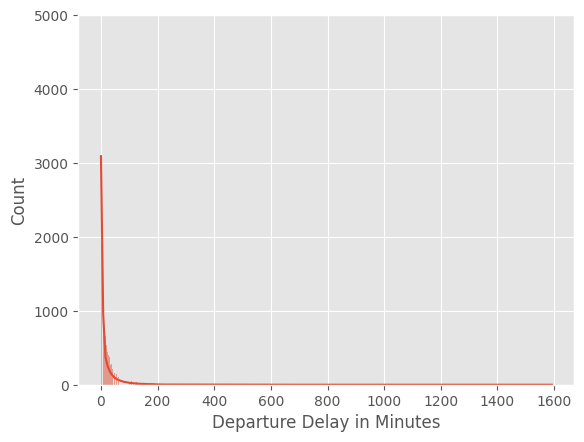

In [ ]:
# Le estamos haceindo un foco a la variable, hay una mayor frecuencia de retraso en minutos mas bajos, vemos que tiene un comportamiento exponencial
# No tiene valores atipicos, es normal que haya mayor frecuencia de muchos retrasos de pocos minutos
sb.histplot(data=data, x= data['Departure Delay in Minutes'], kde =True)
plt.ylim(0,5000)
plt.show()

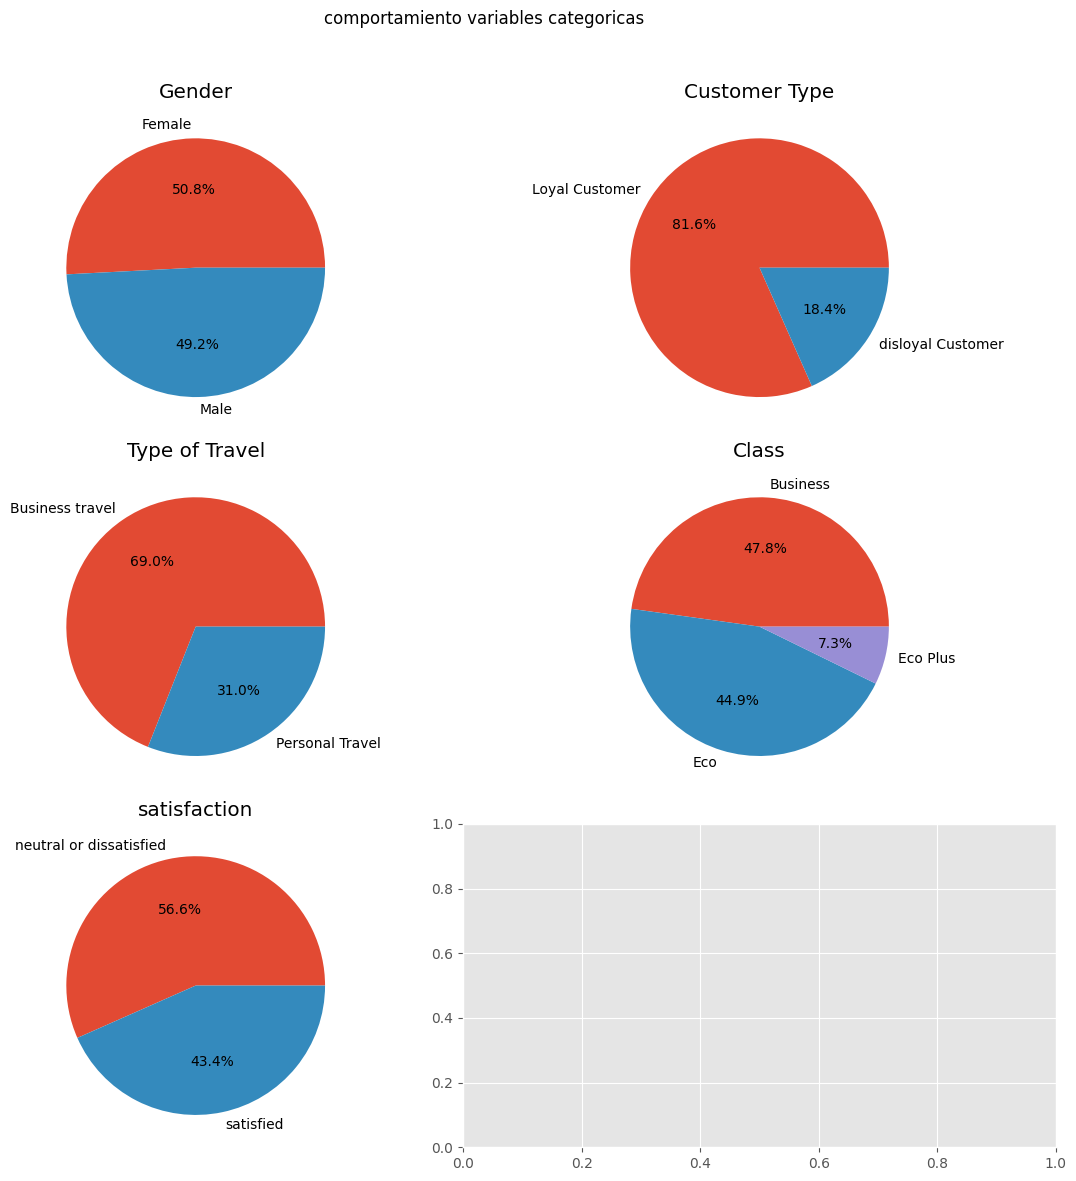

In [ ]:
#grafico de variables categoricas - de tortas
fig, ax= plt.subplots(3,2,figsize =(12,12))
ax=ax.flat
cat_col=data.select_dtypes(include=["object"]).columns
for i, col in enumerate(cat_col):
  ax[i].pie(x=data[col].value_counts(), labels=data[col].value_counts().index, autopct= "%0.1f%%")
  ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("comportamiento variables categoricas")
plt.show()

tipo de viaje no está desvalanceada ya que los está si es más del 80 en algun campo
en clase existe un eco plus - no está desvalanceada pero el modelo lo va a iginorar
candidata a ignorar la variable customer type  y el id



##Factor de Correlación##
Si el comportamiento de una variable, depernde linealmente de otra variable (ρ). Se mueve entre -1 y 1 incluído.

-Correlacion inversa: -1 a 0

-Correlación directa: 0 a 1

-nula: -0.25 y 0.25

-débil: -0.5 a -0.25 y 0.25 a 0.5

-moderada: -0.75 a -0.5 y 0.5 a 0.75

-Fuerte: -1 a -0.75 y 0.75 a 1

Se evalua la correlación con respecto a la y. Y si exiten ser fuertes entonces son multicolinealineales (dependencia lineal de la variable x1 y la x2) (es nociva para modelos de machine learning)

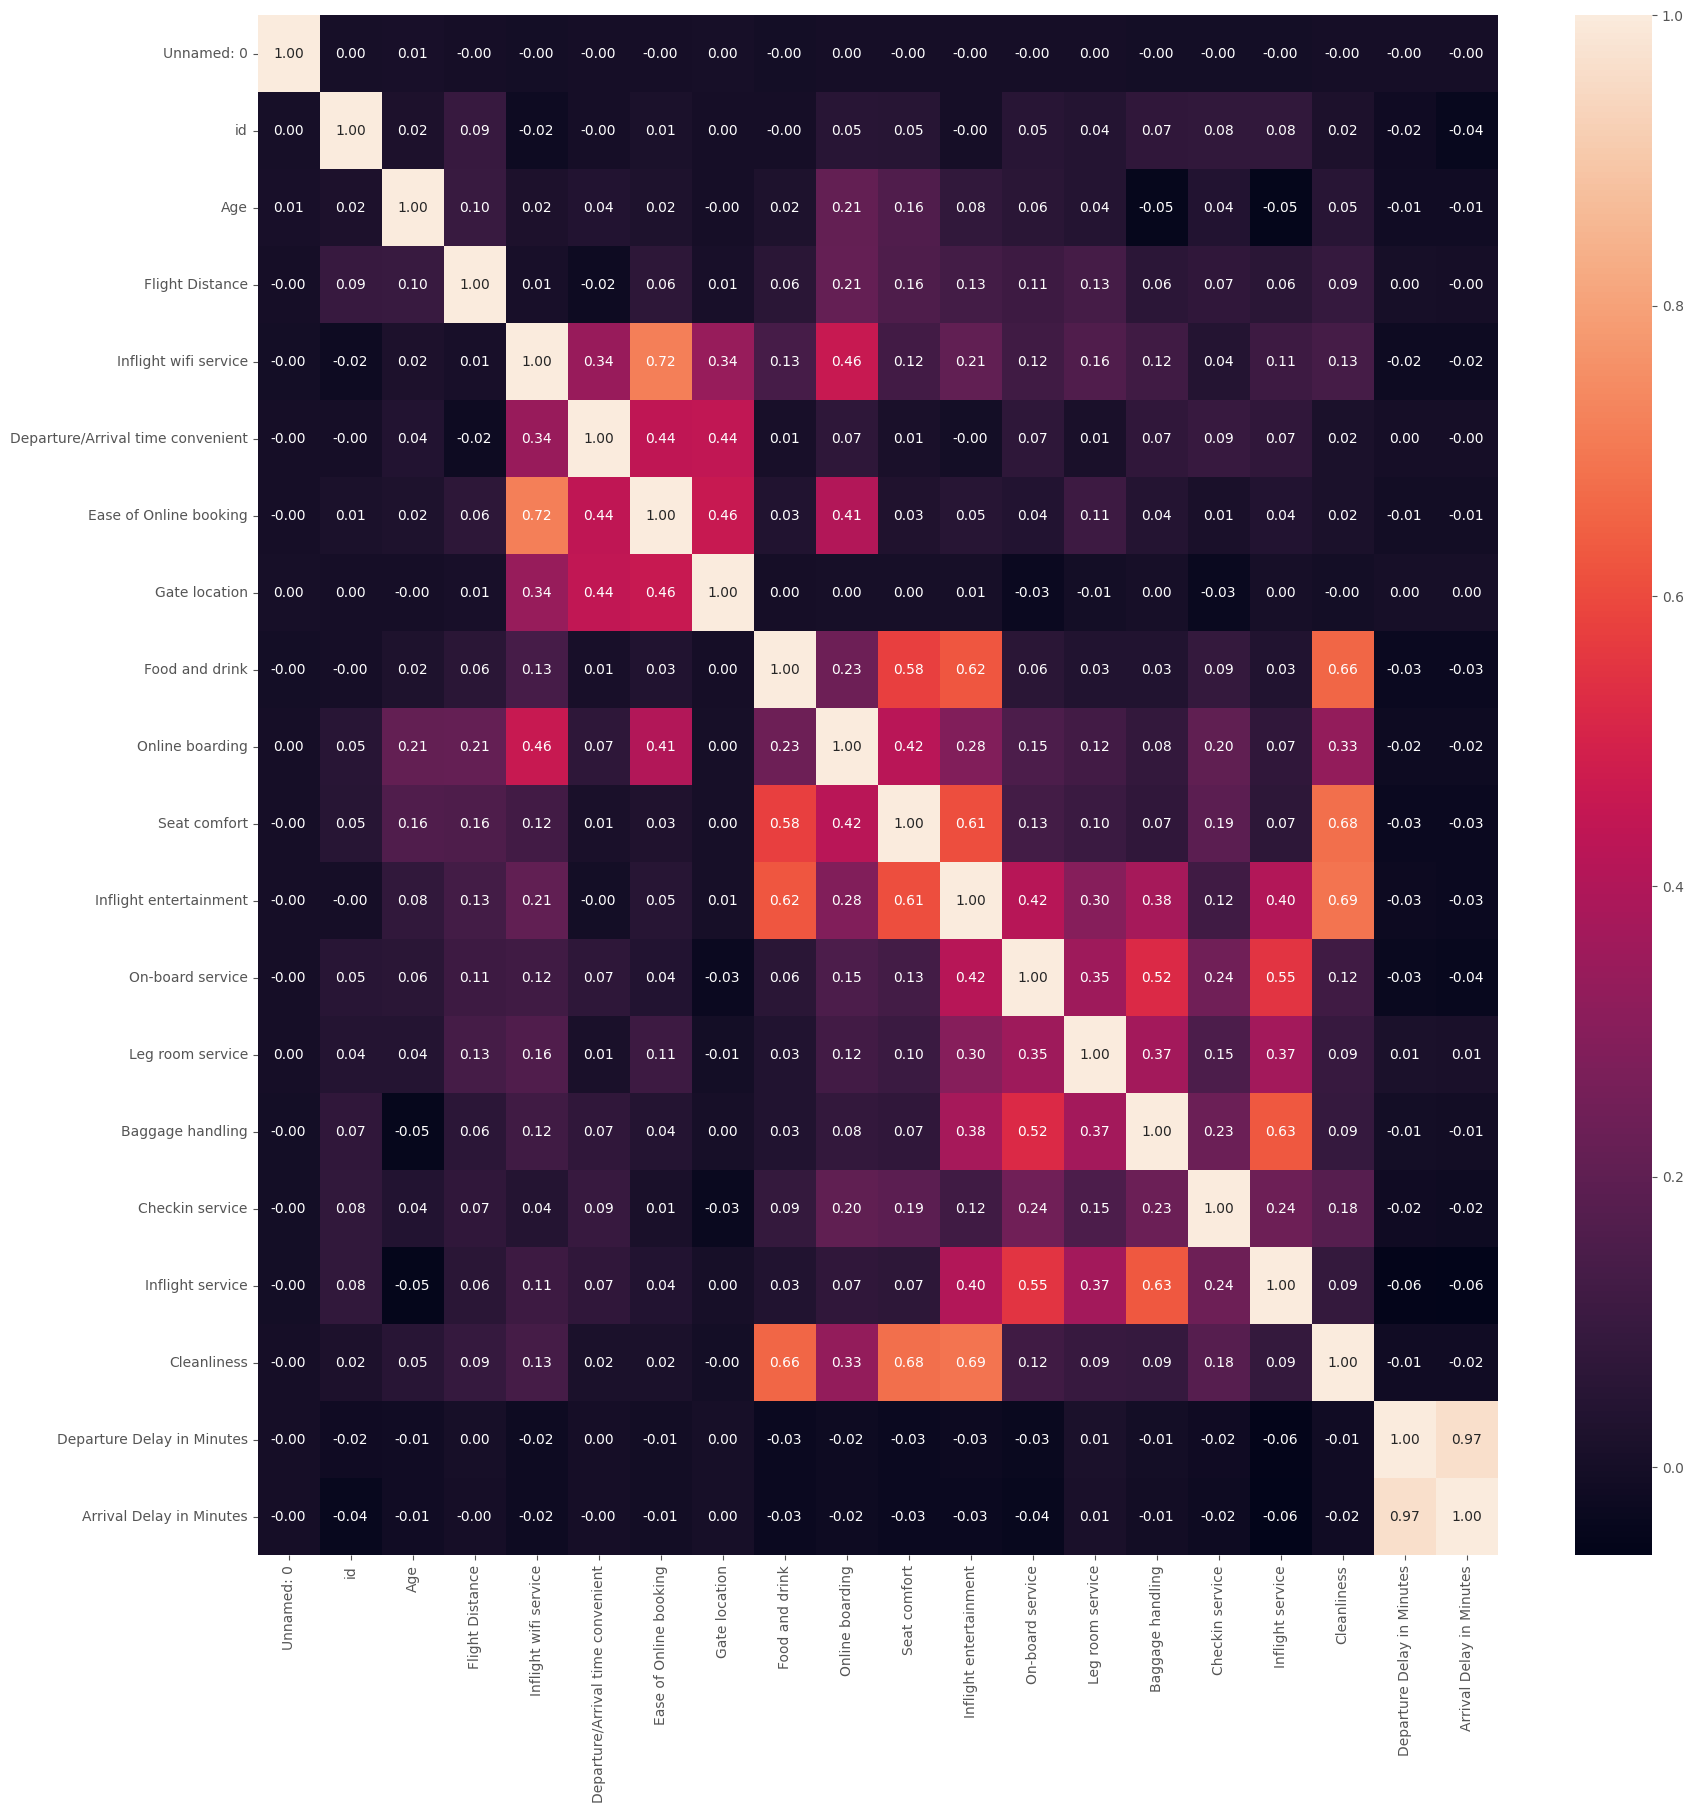

In [ ]:
#grafico de correlación para analisis multivariado
plt.figure(figsize=(20,20))
sb.heatmap(data=data.corr(numeric_only=True), annot =True, fmt=".2f")
plt.show()


Se mira la corr más baja con las demás entonces se ignora una, Se ignora Arrival Delay in Minutes (tiene mayor correlación con las demás variables porque indica menor probabilidad de multicolinealidad) y nos quedamos con Departure Delay in Minutes

 6. Preparación de los datos

 - Activar las desicones para ignorar variables
 - Transformación de variables para que sean entendibles por el modelo


In [ ]:
data_mod= data.drop (["Unnamed: 0", "id", "Customer Type", "Arrival Delay in Minutes"],axis=1)
data_mod.info()
#El dato crudo no se toca , por eso creo un nuevo df llamado data mod

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86152 entries, 0 to 86151
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             86152 non-null  object
 1   Age                                86152 non-null  int64 
 2   Type of Travel                     86152 non-null  object
 3   Class                              86152 non-null  object
 4   Flight Distance                    86152 non-null  int64 
 5   Inflight wifi service              86152 non-null  int64 
 6   Departure/Arrival time convenient  86152 non-null  int64 
 7   Ease of Online booking             86152 non-null  int64 
 8   Gate location                      86152 non-null  int64 
 9   Food and drink                     86152 non-null  int64 
 10  Online boarding                    86152 non-null  int64 
 11  Seat comfort                       86152 non-null  int64 
 12  Infl

In [ ]:
#Transformación de variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

#identificar las columnas según tipo
num_col=data_mod.select_dtypes(include=["int64","float64"]).columns.to_list()
cat_col=data_mod.select_dtypes(include=["object"]).columns.to_list()

#Definir el tipo de transformación por tipo de dato
num_transformer=Pipeline(steps=[("scaler", MinMaxScaler())]) #escala los resultados entre 0 y 1
cat_transformer=Pipeline(steps=[("encoder", OneHotEncoder())]) #transformacion para variable catgorica, la convierte en 0 o en 1

#Diseño del transformador de columnas
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_col), ("cat", cat_transformer, cat_col)], remainder= "passthrough")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Flight Distance',
                                  'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness',
                                  'Departure Delay in Minutes']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'Type of Travel', 'Class',
                                  'satisfaction'])])

In [ ]:
data_pre= preprocessor.fit_transform(data_mod)
data_pre
#genera una lista de listas, donde tenemos un valor entre 0 y 1 para todas las columnas, convertirlo en df para visualizarlo mejor

array([[0.07692308, 0.08663166, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.23076923, 0.04119548, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.24358974, 0.2243538 , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.30769231, 0.21425687, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.30769231, 0.03210824, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.47435897, 0.12318255, 0.8       , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
code_cat= preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(cat_col)
labels=np.concatenate([num_col, code_cat])
data_pro=pd.DataFrame(data_pre, columns =labels)
data_pro.head()
#etsán listos los datos para hacer los modelos de agrupamiento

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,satisfaction_nan
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


El Experimento de Agrupamiento va a tener 2 fases en ajuste (nos entrega n-modelos de variable x, no hay y) y en validación. Dividido en 3 familias

 -modelos pr pariciones: exigen a priory indicar la cantidad de particiones que va a tener los datos significa que cuando quiera construir el modelo el tiene que recibir en que catidad debe partir los datos, más utilizado, ejm. k-means(centro es la media),kmodes ... Siempre van a crear grupos esféricos.

 - modelos jerarquicos: mayor relevancia a la cercania vs la lejania y son de dos tipos.
 Aglomerativo(medelo booton to top, agg hasta que sean 1)
 Divisivo(modelo top to botton, dividirlos hasta que sean 1)

 - modelos por densidad: se basan en la cantidad cercana de individuos
 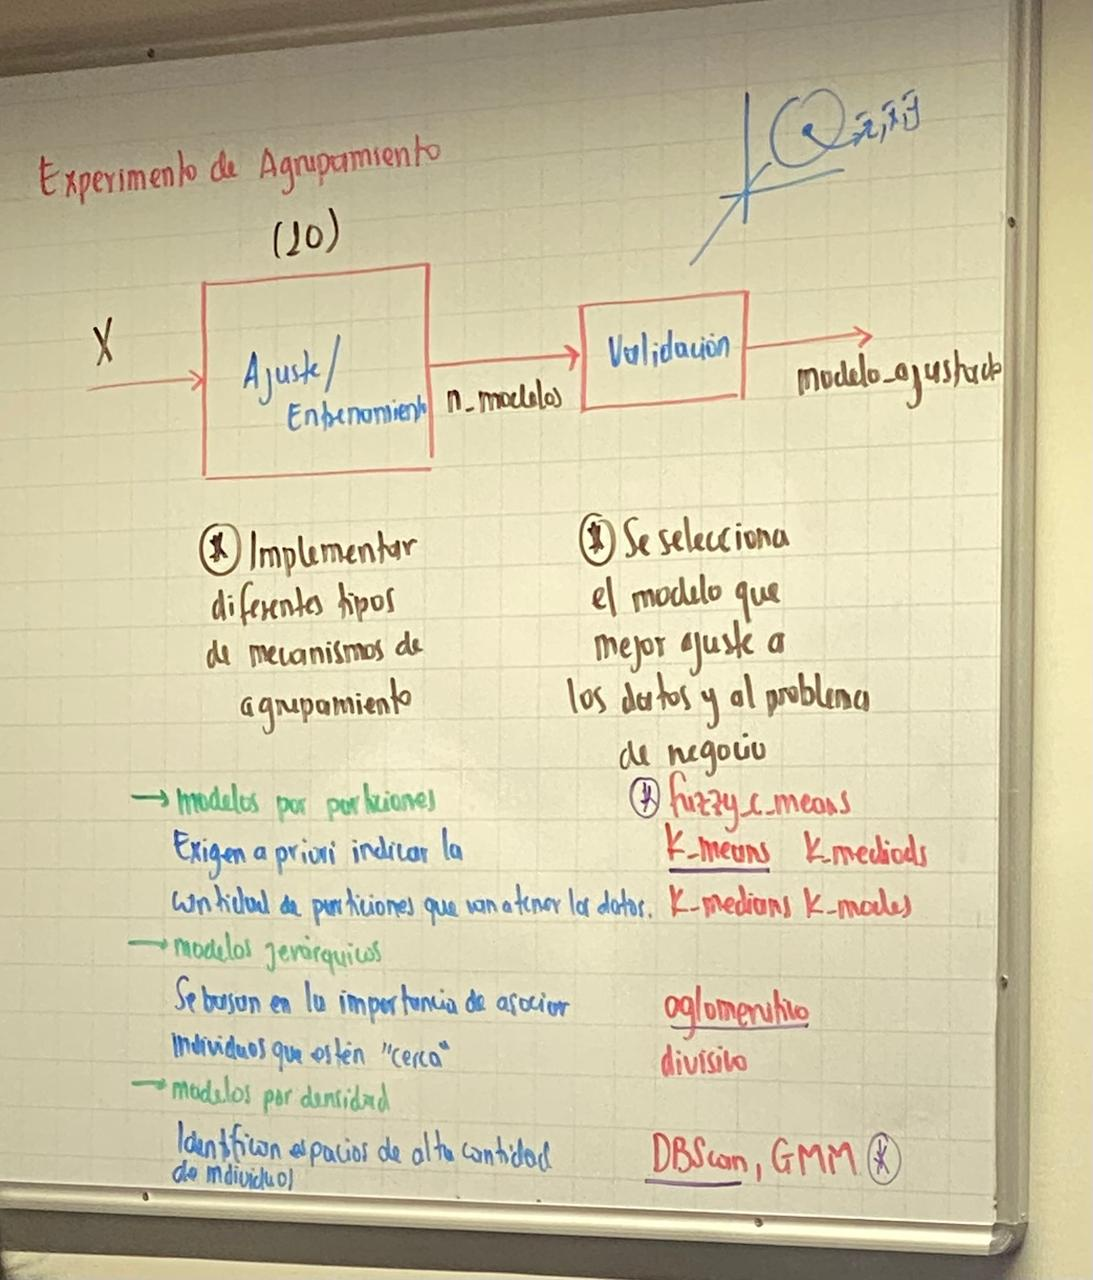

##Hiperparametro##
Parametro del modelo que afecta su estructura matemática y por lo tanto su comportamiento
##Distancia##
Valor númerico calculado como la diferencia espacial entre 2 individuos . Para Optimización (minimiza la distancia entre los individuos de un mismo grupo y maximisa la distancia con los individuos de otros grupos.)

-Euclideana:(p-q)**2

-Manhatan: abs(p-q)

-Coseno: abs(p).abs(q)/||p||*||q||

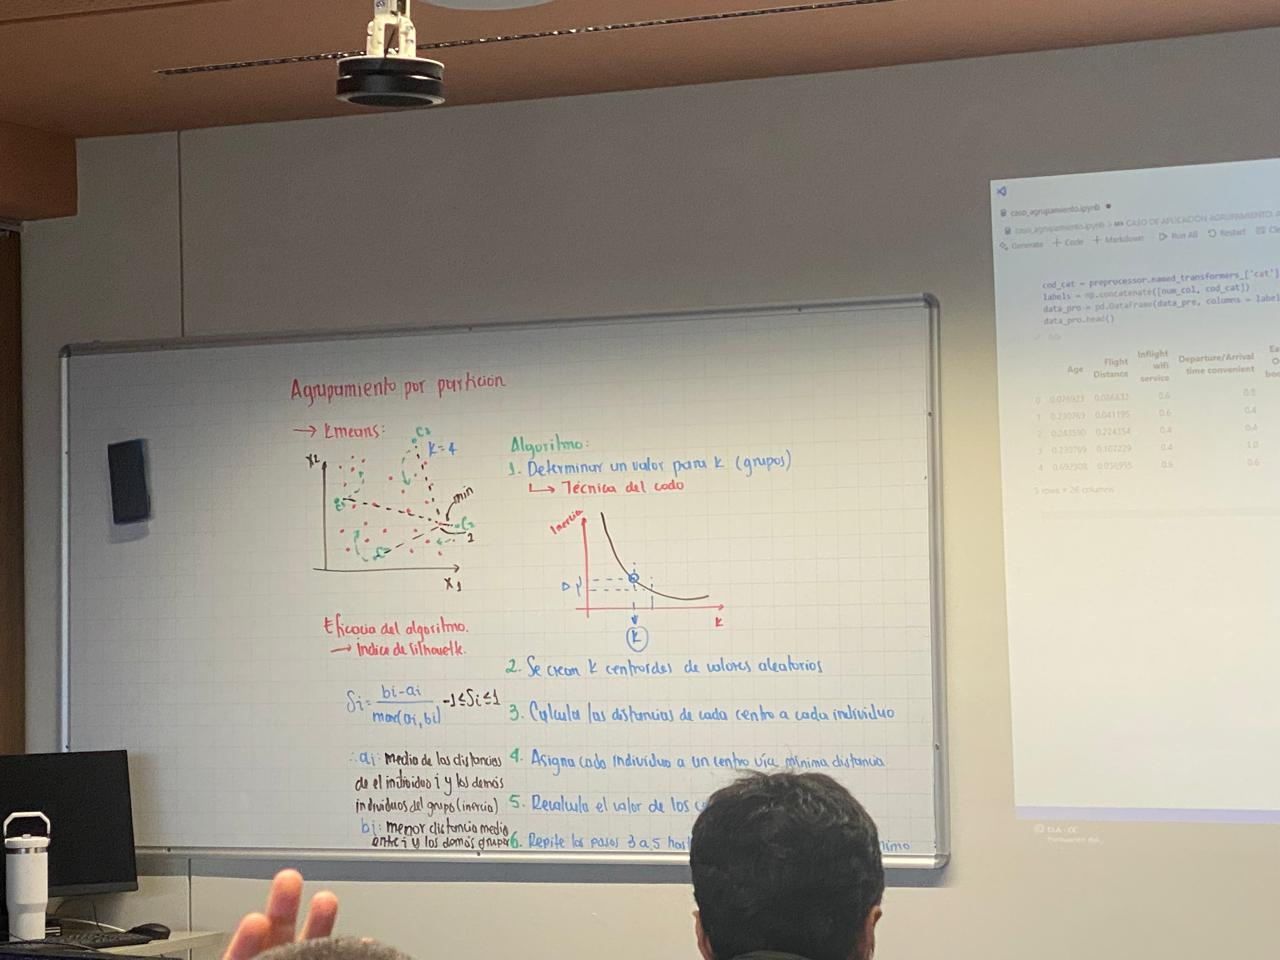
# Agrupamiento por partición

# Kmeans:

Un individuo solo puede estar en 1 grupo.

*Algoritmo:*

1. Determinar un valor para k (grupos).
    - Técnica del codo: Cálcula la distancia dentro de un cluster revisando en que punto se da un cambio de inercia.
2. Se crean k centros de valores aleatorios.
3. Calcula las distancias de cada centro a cada individuo.
4. Asigna cada individuo a un centro vía mínima distancia.
5. Recalcula el valor de los centroides con la media.
6. Repite los pasos 3 a 5 hasta que el cambio de centros sea mínimo.

## Eficacia del Algoritmo

*Índice de Silhouette*

$$
S_i = \frac{b_i-a_i}{max(a_i,b_i)}
$$

- $a_i$: Media de las distancias de el individuo i y los demás individuos del grupo (inercia).
- $b_i$: Menor distancia media entre i y los demás grupos
- Entre más cercano a 1 es mejor.
- -1 ≤ $S_i$ ≤1

In [ ]:
#7. Construcción del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

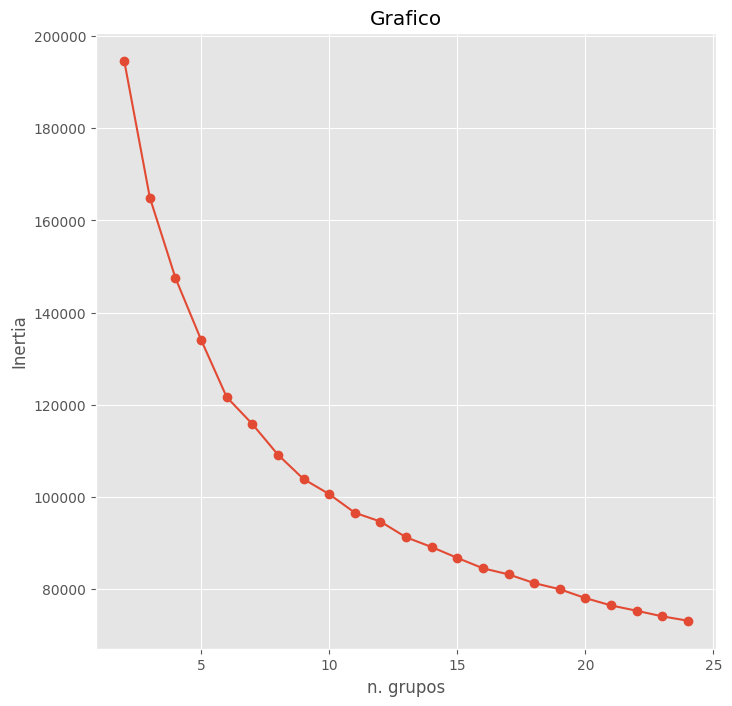

In [ ]:
#buscar el valo rde k
range_k= range(2,25)
inertia =[]

for n_clusters in range_k:
  kmeans_model = KMeans(n_clusters = n_clusters,
                        n_init= 20, random_state=123)
  kmeans_model.fit(data_pro)
  inertia.append(kmeans_model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range_k, inertia, marker ='o')
plt.xlabel('n. grupos')
plt.ylabel('Inertia')
plt.title('Grafico')
plt.show()

#

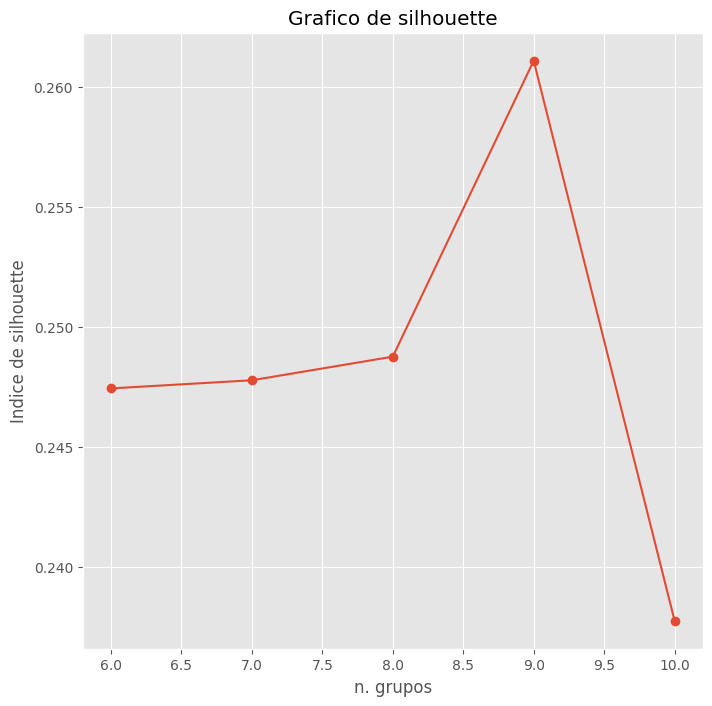

In [ ]:
#busqueda fina de k
#dio malo, mirar que pasa
range_k=range(6,11)
sil_score = [] # Initialize the list here
for n_clusters in range_k:
  kmeans_model = KMeans(n_clusters = n_clusters,
                        n_init= 20, random_state=123)
  kmeans_model.fit(data_pro)
  cluster_label = kmeans_model.fit_predict(data_pro)
  sil_avg= silhouette_score(data_pro, cluster_label)
  sil_score.append(sil_avg)


plt.figure(figsize=(8,8))
plt.plot(range_k, sil_score, marker ='o')
plt.xlabel('n. grupos')
plt.ylabel('Indice de silhouette')
plt.title('Grafico de silhouette')
plt.show()

#Agrupamiento Jerarquico
##Aglomerativo:
1. Define a cada individuo como un grupo
2. Unir de dos en dos los grupos por medio de una medida de distancia y medida de afinidad - *Hay 4 formas de afinidad *
 - Completa: Se tienen 2 grupos con más de un individuo, va a calcular la distancia con todos los individuos. Pero se queda con la distancia más larga de los dos grupos y con esa se calcula la distancia partícular, pero para unir se queda con la mínima distancia entre los dos grupos  
 - Simple: Calcula también todas las distancias, pero cálcula la menor distancia
 - Promedio:Calcula todas las distancias posibles y al final se queda con la distancia promedio
 - Varianza: Va a resumir a todos los grupos en un solo grupo por máxima varianza, va a quedar como un centroide, y con ella calculara la distancia por mayor varianza (método algoritmico word) --> Es mejor

3. Construir y cortar un dendrograma (Grafico que me mustra la forma de como los individuso se empiezan a aglomerar por etapas, pone en la primera parte del eje x a cada individuo, en el eje y está la distancia)



In [ ]:
kmeans_model_final = KMeans(n_clusters = 10, n_init = 20 , random_state= 123)
kmeans_model_final.fit(data_pro)

KMeans(n_clusters=10, n_init=20, random_state=123)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

#Función para dibujar el dendrograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot
        dendrogram(linkage_matrix, **kwargs)

In [ ]:

# Varianza
h_clust_ward = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='ward', distance_threshold=0)
h_clust_ward.fit(data_pro)

dibujarDendrograma(h_clust_ward, color_threshold=0)

In [ ]:
#Promedio
h_clust_ward = AgglomerativeClustering(metric= 'euclidean', linkage= 'ward', distance)
h_clust_ward.fit(data_pro)

dibujarDendrograma(h_clust_ward, color_threshold=0)

....

In [ ]:
#desde 1 hasta 1,6 yendonos de 0,1 en 0,1. Donde los valores son asintoticos
#permite construi un mapa de calor
eps_values=np.arrange(2,10)
dbscan_params=list(product(eps_values,min_samples))
sil_score=[]
for p in dbscan_params:
  y_pred=DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(data_pro_sample)
  sil_score.append(silhouette_score(data_pro_sample,y_pred))


In [ ]:
#Tenemos 2 paramatros y ahí se definirá la cantidad de grupos, teniendo en cuenta cosas como los grupos de frontera
df_param_adj = pd.DataFrame.from_records(dbscan_params,columns =["Epsilon", "Minimas Muestras"])
df_params_adj["Score"]=sil_score
pivot_data= pd.pivottale
df_params_adj.sort_values(by="Score", ascending=False)
#mayor silluette score es 0.31, se tiene 0.31 en toda la columna de 1.4 de epsilon. Si elijo ese epsilon me va a dar el mismo indice. independientemente de la cantidad de muestras mínimas va a dar lo mismo para todos los individuos
#si no corre, ignorar. Debo elegir cualquiera de esos cruces, Epsilon más pequeño y minimas muestras= epsilo es 1.3 y 3 min muestras.
#si dice que todos los elementos están en 1, entonces solo está encontrando un solo grupo y el resto es ruido. Si pasa el dbscan no es suficiente para

In [ ]:
dbscan_final =DBSCAN(eps=1.3, min_samples=3)
dbscan_final.fit(data_pro_sample)
#El gmm va a empezar a lanzar la posible exixtencia de funciones de probabiblidad normal
#Va a construir funciones normales de modo que permita crear


los hiperparametros serán el número de gaussianas y la forma de la varianza, dentro del método gmm existen 4 formas de varianza
diagonal:las varianzas se alineen a x1 o x2, osea mantener la variablilidad de todos los posibles ejer o caracteristicas.
Esferica: Va a mantener que todas las gausiana existentes sean de forma esferica,
full:Permite que cada gaussiana tenga una varianza distinta
- Vamos a iterar el método gmm para determinar la forma de la gaussiana


In [ ]:
from sklearn.mixture import GaussianMixture
fig, ax= plt.subplots(figsize =(6,5))
n_gauss = range(2,40)
var_types=["spherical", "tied", "diag","full"]
for covariance_type in var_types:
  valor_bic=[]
  for i in n_gauss:
    modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
    modelo= modelo.fit(data_pro_sample)
    valor_bic.append(modelo.bic(data_pro_sample))
  ax.plot(n_gauss, valor_bic, label=covariance_type)
ax.set_tittle("Valor BIC")
ax.set_xlabel("Cantidad de gaussianas")
ax.legend()
plt.show()
#Se mira por el byc, el min valor de full, ahí son la cantidad de gaussianas. Ahí es donde está el min valor alcanzado.
#Llegamos hasta decir cual es el mejor agrupamiento y ver si la hipotesis que se planteó se cumple.
#Terminar el miercoles con la presentación de eso. Y entender muy bien el código.

8. Evaluacion del modelo
Nos indica cual es la probabilidad de pertenencia de un grupo a otro
vamos a calcular los indices de siluette para cara una.
En la evaluación del modelo se utilizará el indice que